## 🕹️ 머신러닝 기초학습
---
#### 중요 알고리즘에 대한 추가 학습본입니다.
&nbsp;
##### [프로그램 분석]
- 이 책에는 서포트벡터머신이 나오지 않더라구요. 중요한 모델이라고 생각해서 이번 시간에 추가로 언급하겠습니다.

![img](https://media.geeksforgeeks.org/wp-content/uploads/20201211181531/Capture.JPG)

    위의 그림이 바로 서포트벡터버신(SVM) 모델입니다.
    분류와 회귀 분석에 사용되는 강력한 지도 학습 알고리즘으로, 주로 이진 분류 문제에 많이 사용됩니다.
    핵심 개념은 최적의 초평면을 찾아 데이터 포인트를 분리하는 것 입니다. SVM은 마진 최대화라는 중요한 원리를 기반으로 작동합니다. 초평면은 그림에서 보이는 L1, L2, L3라고 생각하시면 되고, L2를 기준으로 각 데이터 사이의 값이 최대가 되는 것을 마진 최대화라고 합니다.
    마진을 쉽게 설명하면 초평면과 데이터 사이의 공간이죠.
    그림처럼 선형적으로 구분 가능한 경우를 선형 SVM이라고 하고, 선형으로 구분이 불가능한 경우 비선형 SVM이라고 하며 선형적으로 구분되지 않을 때 커널 트릭을 사용합니다. 커널 함수는 저차원 데이터를 고차원 공간으로 변환하여 선형적으로 구분할 수 있도록 도와줍니다.
    
    주로 두 클래스 간 명확한 구분이 필요할 때 유용하게 사용됩니다!

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
train_data = iris.data
train_result = iris.target

In [3]:
# 이진 분류를 위해 타깃 데이터가 0과 1인 값만 사용하겠습니다.
train_data = train_data[train_result != 2]
train_result = train_result[train_result != 2]

In [4]:
train_result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
train_input, test_input, train_target, test_target = train_test_split(train_data,
                                                                      train_result,
                                                                      test_size=0.3)

In [6]:
# 선형 커널 사용
svc = SVC(kernel='linear')

In [7]:
svc.fit(train_input, train_target)

SVC(kernel='linear')

In [8]:
print('svc 훈련 결과 >  {}'.format(svc.score(train_input, train_target)))
print('svc 테스트 결과 > {}'.format(svc.score(test_input, test_target)))

svc 훈련 결과 >  1.0
svc 테스트 결과 > 1.0


In [9]:
target_predict = svc.predict(test_input)

In [11]:
# 정확도 평가
accuracy = accuracy_score(target_predict, test_target)
print('모델 정확도 : {}'.format(accuracy))

모델 정확도 : 1.0


In [13]:
# 1. 데이터셋 불러오기 (Iris 데이터셋)
iris = load_iris()
X = iris.data  # 꽃의 특성 데이터
y = iris.target  # 꽃의 종류 (0: Setosa, 1: Versicolor, 2: Virginica)

# 2. 데이터셋을 훈련셋과 테스트셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# 3. SVM 모델 생성 (선형 커널 사용)
model = SVC(kernel='linear')

# 4. 모델 학습
model.fit(X_train, y_train)

# 5. 테스트셋으로 예측
y_pred = model.predict(X_test)

# 6. 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델의 정확도: {accuracy * 100:.2f}%")

모델의 정확도: 100.00%


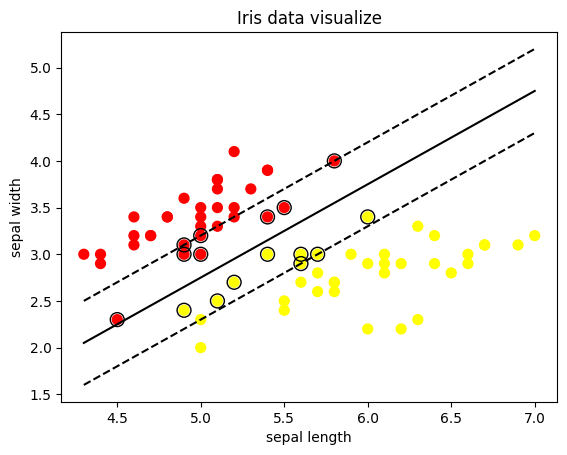

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Iris 데이터셋 불러오기
iris = load_iris()
X = iris.data[:, :2]  # 특성 2개(꽃받침 길이, 꽃받침 너비)만 사용하여 2차원 시각화
y = iris.target

# 2. 클래스 0(Setosa)와 1(Versicolor)만 사용 (이진 분류)
X = X[y != 2]
y = y[y != 2]

# 3. 데이터셋을 훈련셋과 테스트셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. SVM 모델 생성 및 학습 (선형 커널 사용)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# 5. 초평면 그리기 위한 계수 추출
w = model.coef_[0]  # 가중치 벡터
b = model.intercept_[0]  # 절편
slope = -w[0] / w[1]  # 기울기
xx = np.linspace(X[:, 0].min(), X[:, 0].max())  # x 값 범위 설정
yy = slope * xx - b / w[1]  # y 값 계산

# 6. 서포트 벡터의 마진 구간 (초평면에서 일정 거리만큼 떨어진 선)
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + slope ** 2) * margin
yy_up = yy + np.sqrt(1 + slope ** 2) * margin

# 7. 데이터 포인트 및 초평면 시각화
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')  # 데이터 포인트
plt.plot(xx, yy, 'k-')  # 초평면 (직선)
plt.plot(xx, yy_down, 'k--')  # 아래 마진
plt.plot(xx, yy_up, 'k--')  # 위 마진

# 8. 서포트 벡터 강조 표시
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k')

plt.title('Iris data visualize')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()